# Using pystan  
https://pystan.readthedocs.io/en/latest/getting_started.html

In [1]:
%matplotlib inline
import pystan
import matplotlib

In [2]:
schools_code = """
data {
    int<lower=0> J; // number of schools
    real y[J]; // estimated treatment effects
    real<lower=0> sigma[J]; // s.e. of effect estimates
}
parameters {
    real mu;
    real<lower=0> tau;
    real eta[J];
}
transformed parameters {
    real theta[J];
    for (j in 1:J)
    theta[j] = mu + tau * eta[j];
}
model {
    eta ~ normal(0, 1);
    y ~ normal(theta, sigma);
}
"""

schools_dat = {'J': 8,
               'y': [28,  8, -3,  7, -1,  1, 18, 12],
               'sigma': [15, 10, 16, 11,  9, 11, 10, 18]}

In [3]:
sm = pystan.StanModel(model_code=schools_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_cbe9cd2f1e5ab5d1c7cce1f23ca970b4 NOW.


In [4]:
fit = sm.sampling(data=schools_dat, iter=1000, chains=4)

Alternatively, by importing a .stan data file:

In [5]:
sm = pystan.StanModel(file='data/8schools.stan')
fit = sm.sampling(data=schools_dat, iter=1000, chains=4)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_5f0bdf0403318871b8fe126f239ca318 NOW.


In [6]:
fit2 = sm.sampling(data=schools_dat, iter=10000, chains=4)

In [7]:
la = fit.extract(permuted=True)  # return a dictionary of arrays
mu = la['mu']

## return an array of three dimensions: iterations, chains, parameters
a = fit.extract(permuted=False)

In [8]:
print(fit)

Inference for Stan model: anon_model_5f0bdf0403318871b8fe126f239ca318.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu         7.77    0.12   4.69  -1.46   4.73   7.74  10.77  17.21   1433    1.0
tau        6.36    0.18   5.12   0.18   2.51   5.21   8.88  19.61    851    1.0
eta[0]     0.39    0.02   0.92  -1.52  -0.19   0.43   1.01   2.09   1566    1.0
eta[1]     0.01    0.02    0.9  -1.74   -0.6   0.03   0.62   1.82   1848    1.0
eta[2]     -0.2    0.02   0.93  -2.03  -0.85  -0.21   0.42   1.67   2000    1.0
eta[3]    -0.02    0.02   0.88  -1.81  -0.58  -0.02   0.54   1.75   2000    1.0
eta[4]    -0.35    0.02   0.86  -1.99  -0.93  -0.35   0.18   1.35   1814    1.0
eta[5]     -0.2    0.02   0.91   -2.0   -0.8  -0.22   0.39   1.69   2000    1.0
eta[6]     0.35    0.02    0.9  -1.45  -0.22   0.37   0.93   2.11   1750    1.0
eta[7]     0.

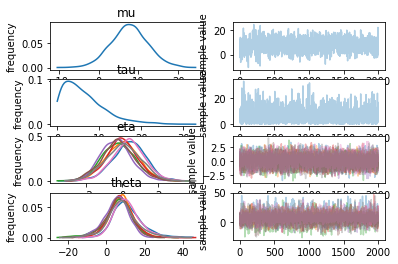

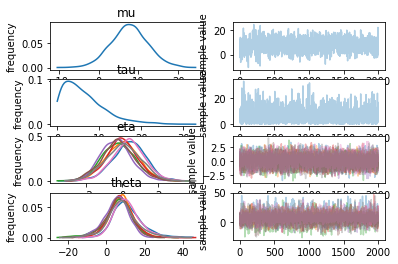

In [9]:
fit.plot()

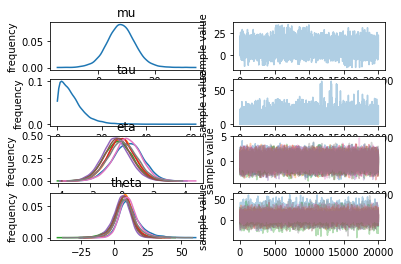

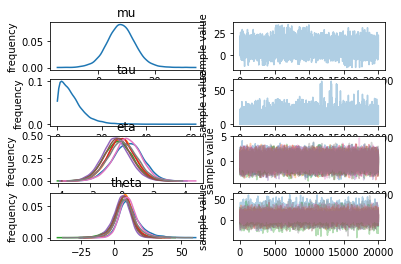

In [10]:
fit2.plot()